In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data /quick exploration

In [2]:
data = pd.read_csv('movies_last.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id
0,0,0,Star Wars: Episode VII - The Force Awakens,(2015),7.9,81,799424,"936,662,225","\nAction, Adventure, Sci-Fi",tt2488496
1,1,1,Avengers: Endgame,(2019),8.5,78,598830,"858,373,000","\nAction, Adventure, Drama",tt4154796
2,2,2,Avatar,(2009),7.8,83,1065708,"760,507,625","\nAction, Adventure, Fantasy",tt0499549
3,3,3,Black Panther,(2018),7.3,88,550256,"700,059,566","\nAction, Adventure, Sci-Fi",tt1825683
4,4,4,Avengers: Infinity War,(2018),8.5,68,723574,"678,815,482","\nAction, Adventure, Sci-Fi",tt4154756


In [4]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 8 columns):
all_titles    5050 non-null object
all_years     5050 non-null object
all_scores    5050 non-null object
all_meta      5050 non-null object
all_votes     5050 non-null object
all_gross     5050 non-null object
all_genres    5050 non-null object
id            5050 non-null object
dtypes: object(8)
memory usage: 315.7+ KB


In [6]:
data.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id
0,Star Wars: Episode VII - The Force Awakens,(2015),7.9,81,799424,"936,662,225","\nAction, Adventure, Sci-Fi",tt2488496
1,Avengers: Endgame,(2019),8.5,78,598830,"858,373,000","\nAction, Adventure, Drama",tt4154796
2,Avatar,(2009),7.8,83,1065708,"760,507,625","\nAction, Adventure, Fantasy",tt0499549
3,Black Panther,(2018),7.3,88,550256,"700,059,566","\nAction, Adventure, Sci-Fi",tt1825683
4,Avengers: Infinity War,(2018),8.5,68,723574,"678,815,482","\nAction, Adventure, Sci-Fi",tt4154756


# Clean data 

In [7]:
import re

In [8]:
def get_decade(x):
    if x == 5:
        return '50s'
    elif x == 6:
        return '60s'
    elif x == 7:
        return '70s'
    elif x == 8:
        return '80s'
    elif x == 9:
        return '90s'
    elif x == 0:
        return '00s'
    elif x == 1:
        return '10s'
    
    

In [9]:
# def inflation_adjust()

In [10]:
# inlf

In [11]:
data['all_years'] = data['all_years'].apply(lambda x: re.sub('[^0-9]','', x))

data['all_genres'] = data['all_genres'].apply(lambda x: x[1:])

data['all_gross'] = data['all_gross'].apply(lambda x: x.replace(',',''))
data['all_gross'] = data['all_gross'].apply(lambda x:  int(x) if x != 'no' else 0)

data['all_scores'] = data['all_scores'].apply(lambda x: x.replace('.',''))
data['all_scores'] = data['all_scores'].apply(lambda x: int(x) if x != 'NO' else 0)

data['all_meta'] = data['all_meta'].apply(lambda x: int(x.replace('.','')) if x != 'no' else 0)


data['all_years'] = data['all_years'].apply(lambda x: int(x))

data['dec'] = data['all_years'].apply(lambda x: int(str(x)[2]))
data['decade'] = data['dec'].apply(lambda x: get_decade(x) )








In [12]:
del data['dec']

In [13]:
data.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s
1,Avengers: Endgame,2019,85,78,598830,858373000,"Action, Adventure, Drama",tt4154796,10s
2,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,00s
3,Black Panther,2018,73,88,550256,700059566,"Action, Adventure, Sci-Fi",tt1825683,10s
4,Avengers: Infinity War,2018,85,68,723574,678815482,"Action, Adventure, Sci-Fi",tt4154756,10s


# Importing external csv to get the budget 

In [14]:
movies_metadata = pd.read_csv('movies_metadata.csv')

/Users/carloscutillas/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
budget_and_id = movies_metadata[['budget', 'imdb_id']]

In [16]:
# budget_and_id

#  Importing external csv to get CPI inflation index 

In [115]:
inflation = pd.read_csv('https://pkgstore.datahub.io/core/cpi-us/cpiai_csv/data/b17bfacbda3c08e51cd13fe544b8fca4/cpiai_csv.csv')

In [116]:
inflation.head()

,Date,Index,Inflation
0,1913-01-01,9.8,NaN
1,1913-02-01,9.8,0.00
2,1913-03-01,9.8,0.00
3,1913-04-01,9.8,0.00
4,1913-05-01,9.7,-1.02


In [78]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
Date         1213 non-null object
Index        1213 non-null float64
Inflation    1212 non-null float64
dtypes: float64(2), object(1)
memory usage: 28.5+ KB


In [117]:
inflation['Date'] = inflation['Date'].apply(lambda x: x[:4]) 

inflation['Date'] = inflation['Date'].astype(int)

In [80]:
inflation.head()

,Date,Index,Inflation
0,1913,9.8,NaN
1,1913,9.8,0.00
2,1913,9.8,0.00
3,1913,9.8,0.00
4,1913,9.7,-1.02


In [118]:
inf = inflation.groupby('Date').mean().reset_index(level= 0)

In [119]:
inf.tail()

,Date,Index,Inflation
97,2010,218.055500,0.122500
98,2011,224.939167,0.244167
99,2012,229.593917,0.145000
100,2013,232.957083,0.125833
101,2014,233.916000,0.370000


# Creating new dataframe

In [120]:
all_data = pd.merge(data, budget_and_id,how='left', left_on='id', right_on='imdb_id')

In [121]:
# all_data.head(5)

In [122]:
all_data.dropna(inplace=True)

In [123]:
all_data['budget'] = all_data['budget'].astype(int)

In [124]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4714 entries, 0 to 5053
Data columns (total 11 columns):
all_titles    4714 non-null object
all_years     4714 non-null int64
all_scores    4714 non-null int64
all_meta      4714 non-null int64
all_votes     4714 non-null object
all_gross     4714 non-null int64
all_genres    4714 non-null object
id            4714 non-null object
decade        4714 non-null object
budget        4714 non-null int64
imdb_id       4714 non-null object
dtypes: int64(5), object(6)
memory usage: 441.9+ KB


In [125]:
# sns.distplot(all_data.all_years)

In [126]:
all_data['genre_bis'] = all_data['all_genres'].apply(lambda x: 'Action' if 'Action' in x
                                                     else ('Romance' if 'Romance' in x else 'no') 
                                                    )

In [127]:
all_data.genre_bis.value_counts()

no         2667
Action     1218
Romance     829
Name: genre_bis, dtype: int64

In [128]:
all_data.shape

(4714, 12)

In [129]:
all_data.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade,budget,imdb_id,genre_bis
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s,245000000,tt2488496,Action
2,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,00s,237000000,tt0499549,Action
5,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,90s,200000000,tt0120338,Romance
6,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,10s,150000000,tt0369610,Action
7,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,10s,220000000,tt0848228,Action


In [130]:
all_data['profit'] = all_data['all_gross'] - all_data['budget']

In [131]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
all_years,4714.0,1.997816e+03,1.347506e+01,1915.0,1990.00,2000.0,2008.00,2019.0
all_scores,4714.0,6.405388e+01,9.691270e+00,19.0,58.00,64.0,71.00,93.0
all_meta,4714.0,4.585342e+01,2.553559e+01,0.0,32.00,49.0,64.00,100.0
all_gross,4714.0,5.506381e+07,6.546027e+07,9074550.0,17540190.75,32864742.5,64469889.00,936662225.0
budget,4714.0,3.268043e+07,4.281290e+07,0.0,233750.00,19000000.0,45000000.00,380000000.0
profit,4714.0,2.238338e+07,5.090702e+07,-186921900.0,435454.00,15101924.0,33580143.25,691662225.0


#  Merging the inflation

In [132]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4714 entries, 0 to 5053
Data columns (total 13 columns):
all_titles    4714 non-null object
all_years     4714 non-null int64
all_scores    4714 non-null int64
all_meta      4714 non-null int64
all_votes     4714 non-null object
all_gross     4714 non-null int64
all_genres    4714 non-null object
id            4714 non-null object
decade        4714 non-null object
budget        4714 non-null int64
imdb_id       4714 non-null object
genre_bis     4714 non-null object
profit        4714 non-null int64
dtypes: int64(6), object(7)
memory usage: 515.6+ KB


In [133]:
inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
Date         102 non-null int64
Index        102 non-null float64
Inflation    102 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [134]:
data_with_inflation = pd.merge(all_data, inf,how='left', left_on='all_years', right_on='Date')

# Clean data with inflation 

In [135]:
del data_with_inflation['Inflation']

In [136]:
data_with_inflation.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade,budget,imdb_id,genre_bis,profit,Date,Index
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s,245000000,tt2488496,Action,691662225,NaN,NaN
1,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,00s,237000000,tt0499549,Action,523507625,2009.0,214.537000
2,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,90s,200000000,tt0120338,Romance,459325379,1997.0,160.516667
3,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,10s,150000000,tt0369610,Action,502270625,NaN,NaN
4,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,10s,220000000,tt0848228,Action,403279547,2012.0,229.593917


In [90]:
def get_last_years_inflation(x):
    if x == int(2015):
        return 237
    elif x == 2016:
        return 240
    elif x == 2017:
        return 245
    elif x == 2018:
        return 251
    elif x == 2019:
        return 256
#     else:
#         return x
    

In [74]:
# data_with_inflation['Index_all'] = data_with_inflation['all_years'].apply(lambda x: 237 if x == 2015 else data_with_inflation['Index_all'] )

In [137]:
data_with_inflation['Index_all'] = data_with_inflation['all_years'].apply(lambda x: get_last_years_inflation(x) )
data_with_inflation['Index_all'] = data_with_inflation['Index_all'].astype(str)

data_with_inflation['Index'] = data_with_inflation['Index'].astype(str)


In [150]:
data_with_inflation['Index_all_years'] = data_with_inflation.Index.fillna('') + data_with_inflation.Index_all.fillna('')

# data_with_inflation['Index_all_years'] = data_with_inflation['Index_all'].combine_first(data_with_inflation['Index'])

data_with_inflation['Index_all_years'] = data_with_inflation['Index_all_years'].apply(
    lambda x: x.lstrip('nan').rstrip('nan'))


In [151]:
data_with_inflation['Index_all_years']

0                    237.0
1                  214.537
2       160.51666666666665
3                    237.0
4        229.5939166666667
5                 215.3025
6                    240.0
7                    245.0
8                    240.0
9       166.57500000000002
10                   237.0
11       229.5939166666667
12      188.88333333333335
13                    96.5
14      232.95708333333332
15       201.5916666666667
16      148.22500000000002
17      218.05550000000002
18                   245.0
19      232.95708333333332
20                   240.0
21       229.5939166666667
22                 179.875
23      144.45833333333331
24                 214.537
25      232.95708333333332
26                   245.0
27      224.93916666666667
28      183.95833333333334
29       195.2916666666667
               ...        
4684    38.824999999999996
4685    156.84999999999997
4686    30.249999999999996
4687    163.00833333333335
4688    130.65833333333333
4689                 251.0
4

In [156]:
del data_with_inflation['Index_all']
del data_with_inflation['Index']
del data_with_inflation['Date']


In [157]:
data_with_inflation.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade,budget,imdb_id,genre_bis,profit,Index_all_years
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s,245000000,tt2488496,Action,691662225,237.0
1,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,00s,237000000,tt0499549,Action,523507625,214.537
2,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,90s,200000000,tt0120338,Romance,459325379,160.51666666666665
3,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,10s,150000000,tt0369610,Action,502270625,237.0
4,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,10s,220000000,tt0848228,Action,403279547,229.5939166666667


## Adjusting budget and gross to inflation

In [161]:
#  Re converting stringg to integer on index 

data_with_inflation['Index_all_years'] = data_with_inflation['Index_all_years'].astype(float)

In [176]:
data_with_inflation['budget_adjusted'] = (data_with_inflation['budget'] / data_with_inflation['Index_all_years'])*100

data_with_inflation['gross_adjusted'] = (data_with_inflation['all_gross'] / data_with_inflation['Index_all_years'])*100



In [177]:
data_with_inflation['profit_adjusted'] =  data_with_inflation['gross_adjusted'] - data_with_inflation['budget_adjusted'] 

In [181]:
data_with_inflation.describe()

,all_years,all_scores,all_meta,all_gross,budget,profit,Index_all_years,budget_adjusted,gross_adjusted,profit_adjusted
count,4714.000000,4714.000000,4714.000000,4.714000e+03,4.714000e+03,4.714000e+03,4714.000000,4.714000e+03,4.714000e+03,4.714000e+03
mean,1997.815868,64.053882,45.853415,5.506381e+07,3.268043e+07,2.238338e+07,164.620712,1.807042e+07,3.699981e+07,1.892939e+07
std,13.475065,9.691270,25.535594,6.546027e+07,4.281290e+07,5.090702e+07,57.179633,2.120612e+07,4.449424e+07,4.148857e+07
min,1915.000000,19.000000,0.000000,9.074550e+06,0.000000e+00,-1.869219e+08,10.108333,0.000000e+00,3.593108e+06,-1.176050e+08
25%,1990.000000,58.000000,32.000000,1.754019e+07,2.337500e+05,4.354540e+05,130.658333,2.124862e+05,1.205651e+07,2.533111e+05
50%,2000.000000,64.000000,49.000000,3.286474e+07,1.900000e+07,1.510192e+07,172.200000,1.196467e+07,2.243993e+07,1.064802e+07
75%,2008.000000,71.000000,64.000000,6.446989e+07,4.500000e+07,3.358014e+07,214.537000,2.594637e+07,4.389225e+07,2.582133e+07
max,2019.000000,93.000000,100.000000,9.366622e+08,3.800000e+08,6.916622e+08,256.000000,1.689346e+08,5.325013e+08,5.143519e+08


1915      1
1918      1
1950      1
1951      1
1952      4
1953      6
1954      7
1955      7
1956      9
1957      7
1958      4
1959     13
1960     15
1961     10
1962     12
1963     13
1964     11
1965     14
1966     10
1967     18
1968     14
1969     15
1970     14
1971     14
1972     12
1973     16
1974     22
1975     25
1976     19
1977     32
       ... 
1990     99
1991     97
1992     99
1993    113
1994    113
1995    118
1996    132
1997    118
1998    122
1999    128
2000    127
2001    127
2002    145
2003    128
2004    141
2005    149
2006    153
2007    142
2008    147
2009    142
2010    127
2011    142
2012    126
2013    128
2014    137
2015    120
2016    141
2017     73
2018     10
2019      5
Name: all_years, Length: 72, dtype: int64

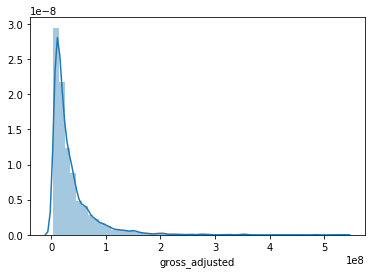

In [179]:
sns.distplot(data_with_inflation.gross_adjusted)

In [ ]:
# data_for_budget = all_data[all_data['budget'] > 0]

In [ ]:
# data_for_budget.to_csv('movies_for_budget', encoding='utf-8')
# all_data.to_csv('movies_all', encoding='utf-8')


In [185]:
data_with_inflation.to_csv('data_adjusted_to_inflation.csv')